In [20]:
from collections import Counter  # For counting words

import ast  # Interpret string as Python command
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
# Reading the data
data = pd.read_csv('../data/train.csv')

## Overview

In [22]:
len(data)

3000

In [23]:
data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [170]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Exploring Features

### Keywords

In [25]:
print('Number of NAs: {}'.format(len(data[data.Keywords.isna()])))

Number of NAs: 276


In [26]:
print(data.Keywords[0])
print(data.Keywords[1])
print(data.Keywords[2])

[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
[{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]


In [27]:
# Function for extracting names out of a keywords list 
# Also replaces spaces by underscores for better further processing
def extract_names(keyword_list):
    return list(map(lambda x: x['name'].replace(' ', '_'), ast.literal_eval(keyword_list)))

# Apply above function to get a list of name lists
list_of_name_list = data[data.Keywords.notna()]["Keywords"].map(extract_names, na_action=None).tolist()

# Flatten the list of name lists
list_of_names = [y for x in list_of_name_list for y in x]

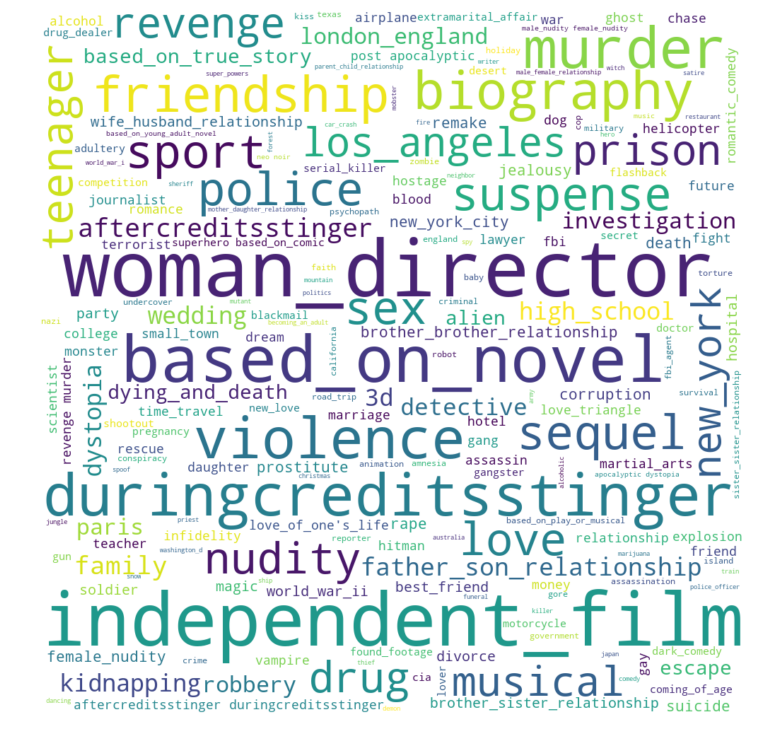

In [28]:
# Create a list of words
text = " ".join(list_of_names)
 
# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=5, background_color="white").generate(text)
 
# Display the generated image:
plt.figure(figsize=(27,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

<b>TODO</b>: Dafuq!? Warum ist duringcreditsstinger und aftercreditsstinger doppelt?

In [85]:
counter = Counter(list_of_names)
print("Number of keywords: {}".format(len(counter)))
counter.most_common(25)

Number of keywords: 7400


[('woman_director', 175),
 ('independent_film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based_on_novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73),
 ('revenge', 73),
 ('friendship', 72),
 ('sex', 71),
 ('suspense', 67),
 ('sequel', 66),
 ('love', 64),
 ('police', 64),
 ('teenager', 61),
 ('nudity', 57),
 ('female_nudity', 53),
 ('drug', 52),
 ('prison', 50),
 ('musical', 49),
 ('high_school', 49),
 ('los_angeles', 48)]

In [86]:
print('{} keywords occur only once in the whole dataset'.format(len([x for (x,y) in counter.items() if y == 1])))

4212 keywords occur only once in the whole dataset


#### Insights from Keywords

* 7400 keywords for 3000 movies (4212 of those occur only once)
* 276 movies do not have any keyword at all
* The amount of keywords per movie differs
* Ideas:    
    * Take only keywords that occur more than x times, rest replace by "other". Replace None by "No keyword"
    * Remove keywords that only occur once
    * Research semantic word clustering and check if applicable here
    * Wiebke: Only take top revenue films and redo analysis below

#### New feature: has_top_keyword

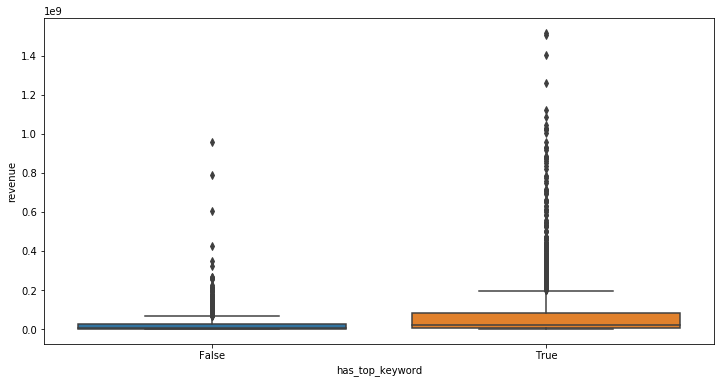

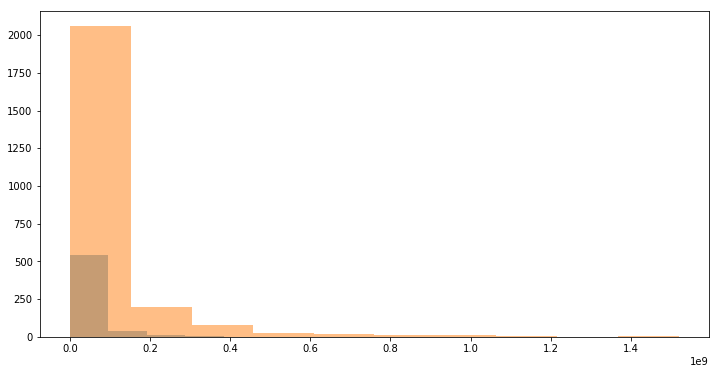

In [225]:
# Remove single usage keywords
multi_keywords = [(x,y) for (x,y) in counter.items() if y != 1]

# Computing the top x most used percent of keywords
perc_thresh = 90
perc = np.percentile([y for (x,y) in multi_keywords], perc_thresh)
top_keywords = [x for (x,y) in counter.items() if y >= perc]

def has_top_keyword(keyword_list):
    if not pd.isna(keyword_list):
        list_of_keywords = extract_names(keyword_list)
        for keyword in list_of_keywords:
            if keyword in top_keywords:
                return True
    return False

copy_data = data.copy()
copy_data['has_top_keyword'] = copy_data["Keywords"].map(has_top_keyword, na_action=None)

plt.figure(figsize=(12,6))
sns.boxplot(x='has_top_keyword', y='revenue', data=copy_data)
plt.show()

plt.figure(figsize=(12,6))
plt.hist(x='revenue', data=copy_data[copy_data['has_top_keyword'] == False], alpha=0.5)
plt.hist(x='revenue', data=copy_data[copy_data['has_top_keyword'] == True], alpha=0.5)
plt.show()

### Revenue

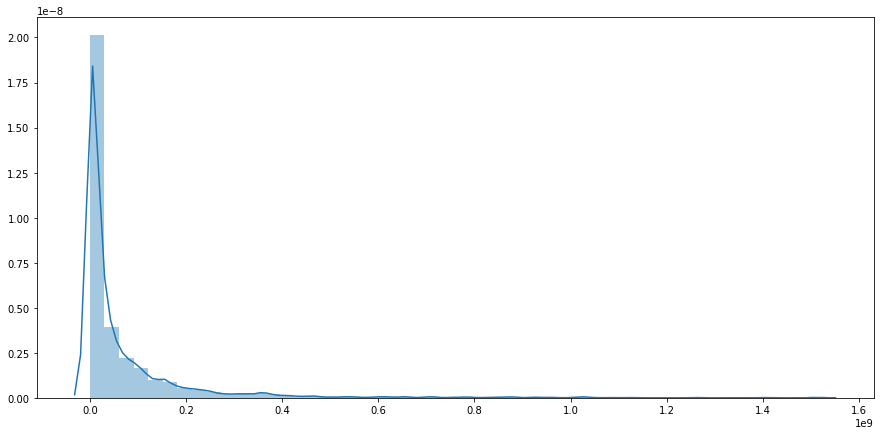

In [30]:
plt.figure(figsize=(15,7))
sns.distplot(data[['revenue']])

### Budget

In [31]:
budget_not_null = data[data.budget.notna()]

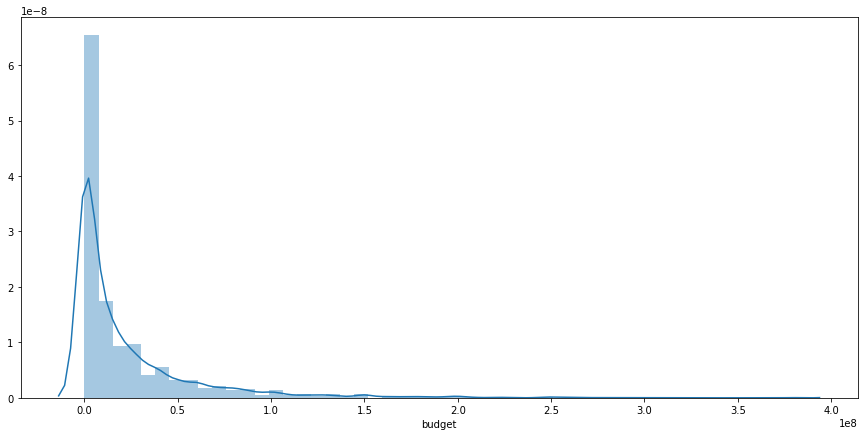

In [32]:
plt.figure(figsize=(15,7))
sns.distplot(budget_not_null.budget)

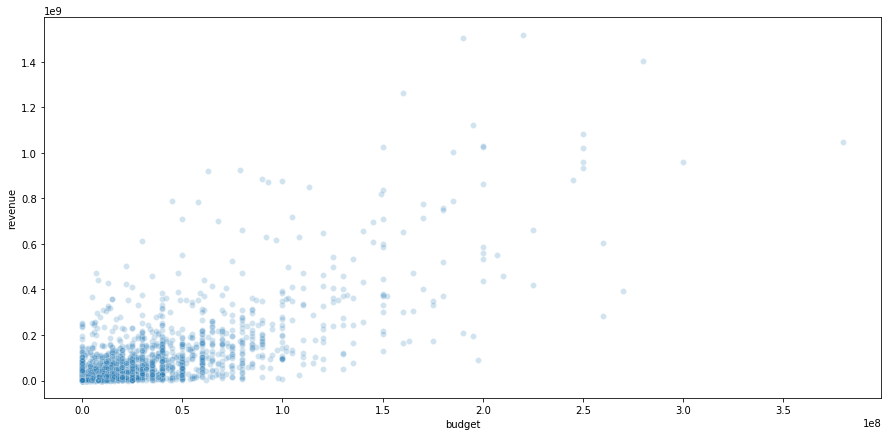

In [33]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='budget', y='revenue', data=budget_not_null, alpha=0.2)

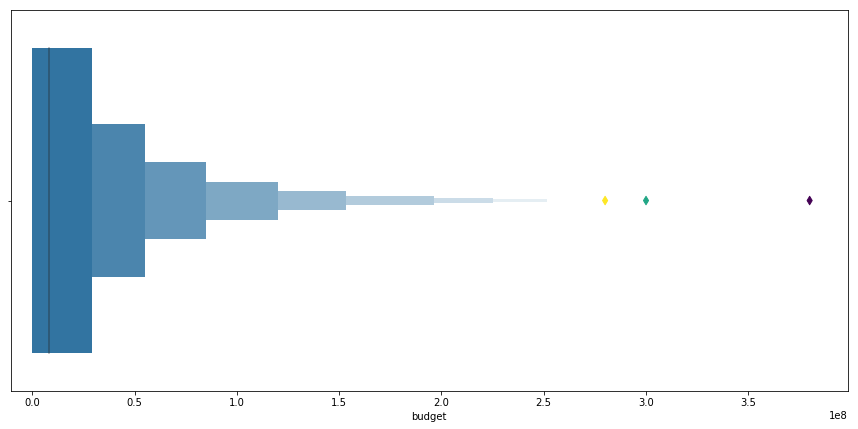

In [34]:
plt.figure(figsize=(15,7))
sns.boxenplot(budget_not_null.budget)

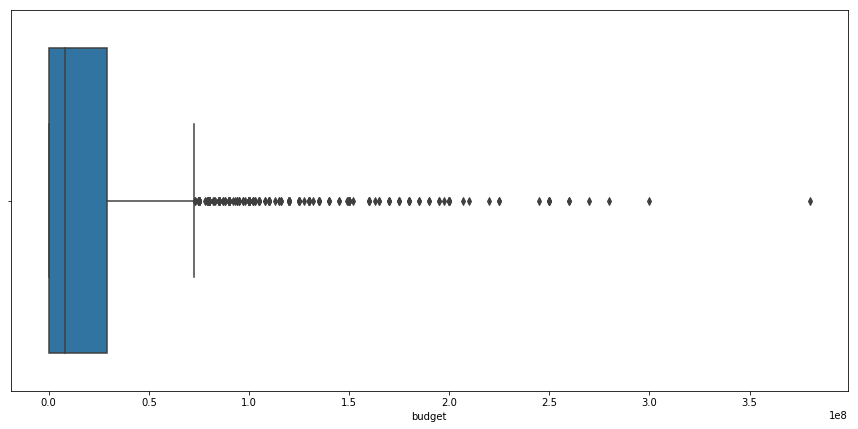

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(budget_not_null.budget)

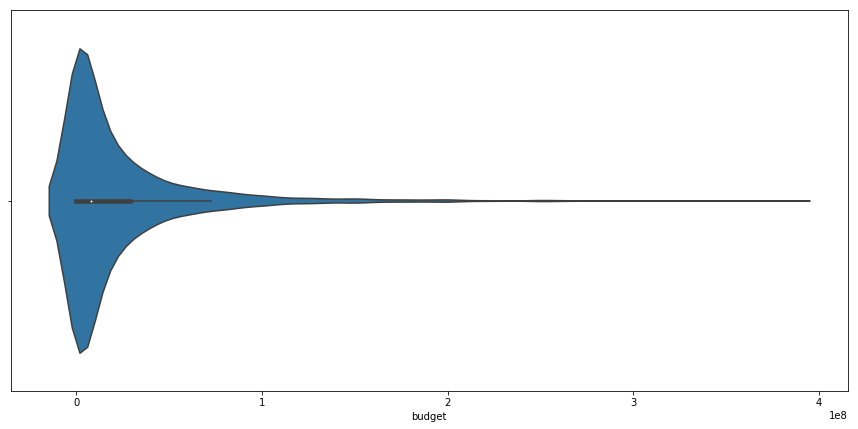

In [36]:
plt.figure(figsize=(15,7))
sns.violinplot(budget_not_null.budget)